In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from itertools import product

In [3]:
df = pd.read_csv('Data/my/User_Question_Answer.csv', low_memory=False)

In [4]:
df_q = pd.read_csv('Data/my/Questions_Answers.csv')

In [5]:
df.head()

,user_id,question_id,answer_id,datetimestamp
0,10109,21045,60570,2018-09-06 16:18:02
1,10135,21045,60571,2018-09-06 15:20:57
2,10237,21045,60571,2018-09-06 13:30:05
3,10261,21045,60570,2018-09-06 14:40:45
4,10268,21045,60571,2018-09-06 15:06:17


In [6]:
df_q.head(2)

,question_id,title,start_age,end_age,sex_id,category_id,nb_targets,nb_points,created_at,updated_at,topic_id,prefered_lang,rank,Total_Number_of_Answers,answer_id,description,Number_Of_Answers
0,21045,Are you trying to lose weight?,10,80,0.0,7,3000,1,2018-09-06 01:23:42,2018-09-06 15:12:03,0,0.0,0,3000,60570,Yes,1943
1,21045,Are you trying to lose weight?,10,80,0.0,7,3000,1,2018-09-06 01:23:42,2018-09-06 15:12:03,0,0.0,0,3000,60571,No,1057


In [7]:
df.shape

(512410, 4)

In [8]:
df = df[['user_id', 'answer_id']].copy()

In [9]:
df.head()

,user_id,answer_id
0,10109,60570
1,10135,60571
2,10237,60571
3,10261,60570
4,10268,60571


In [10]:
matrix = pd.get_dummies(df,  'answer_id')

In [11]:
matrix.drop('answer_id_2018-09-12 19:09:06', axis=1, inplace=True)

In [12]:
matrix.head()

,user_id,answer_id_60570,answer_id_60571,answer_id_60724,answer_id_60725,answer_id_60726,answer_id_60727,answer_id_60728,answer_id_60732,answer_id_60733,...,answer_id_62302,answer_id_62303,answer_id_62304,answer_id_62305,answer_id_62306,answer_id_62307,answer_id_62308,answer_id_62309,answer_id_62310,answer_id_62311
0,10109,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10135,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10237,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10261,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10268,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
len(matrix)

512410

In [14]:
data = matrix.groupby('user_id')[matrix.columns[1:]].sum().reset_index()

In [15]:
data.head()

,user_id,answer_id_60570,answer_id_60571,answer_id_60724,answer_id_60725,answer_id_60726,answer_id_60727,answer_id_60728,answer_id_60732,answer_id_60733,...,answer_id_62302,answer_id_62303,answer_id_62304,answer_id_62305,answer_id_62306,answer_id_62307,answer_id_62308,answer_id_62309,answer_id_62310,answer_id_62311
0,89,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,183,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10109,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
data.set_index('user_id', inplace=True)

In [17]:
data.head(2)

,answer_id_60570,answer_id_60571,answer_id_60724,answer_id_60725,answer_id_60726,answer_id_60727,answer_id_60728,answer_id_60732,answer_id_60733,answer_id_60734,...,answer_id_62302,answer_id_62303,answer_id_62304,answer_id_62305,answer_id_62306,answer_id_62307,answer_id_62308,answer_id_62309,answer_id_62310,answer_id_62311
user_id,,,,,,,,,,,,,,,,,,,,,
89,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dendogram for 50 users

In [18]:
sub_data = data[:60].copy()

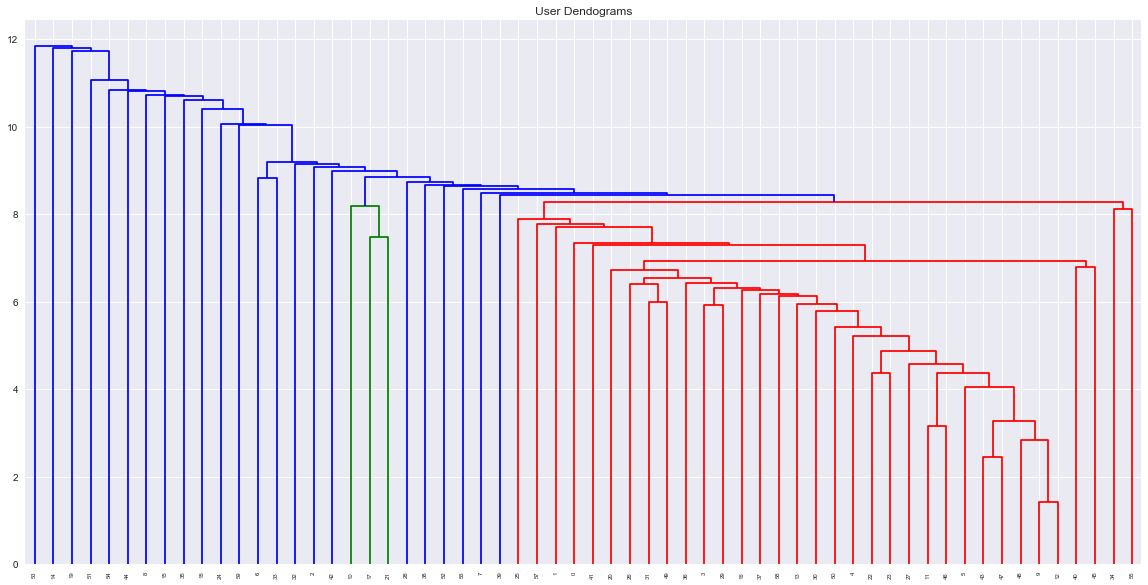

In [19]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))  
plt.title("User Dendograms")  
dend = shc.dendrogram(shc.linkage(sub_data, method='average'))  

### Hierarchical Cluster

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [21]:
options = [30, 50]
for n_clus in options:
    cluster = AgglomerativeClustering(n_clusters=n_clus, linkage='average')
    labels = cluster.fit_predict(data)
    silhouette_avg = round(silhouette_score(data, labels), 3)
    print("For n_clusters", n_clus, "the average silhouette_score is: ", silhouette_avg)

For n_clusters 30 the average silhouette_score is:  0.174
For n_clusters 50 the average silhouette_score is:  0.166


In [22]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = labels

In [23]:
cluster_map.head(10)

,data_index,cluster
0,89,0
1,107,0
2,173,0
3,183,0
4,10109,0
5,10117,0
6,10119,0
7,10135,0
8,10237,0
9,10239,0


In [24]:
cluster_map.cluster.value_counts()

0     7095
23      14
6       10
7        7
11       7
9        6
21       5
34       5
2        5
24       4
12       4
40       4
1        4
46       4
14       3
8        3
37       3
4        3
10       3
45       3
18       3
30       3
42       3
3        3
13       2
35       2
16       2
20       2
32       2
19       2
48       2
15       2
22       2
5        2
17       2
38       2
49       2
25       1
29       1
33       1
44       1
36       1
41       1
28       1
27       1
43       1
31       1
26       1
39       1
47       1
Name: cluster, dtype: int64

### K-Mode Clustering

In [25]:
from kmodes.kmodes import KModes

In [123]:
np.random.seed(10000)
clusters_n = [3, 5, 8]

for num_clust in clusters_n:
    km = KModes(n_clusters=num_clust, init='Huang', n_init=5, verbose=1, max_iter=100)
    label_m = km.fit_predict(data)

    silhouette_avg = round(silhouette_score(data, label_m), 3)
    print("For n_clusters", num_clust, "the average silhouette_score is: ", silhouette_avg)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2287, cost: 466886.0
Run 1, iteration: 2/100, moves: 992, cost: 464181.0
Run 1, iteration: 3/100, moves: 151, cost: 464129.0
Run 1, iteration: 4/100, moves: 0, cost: 464129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2367, cost: 465172.0
Run 2, iteration: 2/100, moves: 715, cost: 464131.0
Run 2, iteration: 3/100, moves: 196, cost: 463990.0
Run 2, iteration: 4/100, moves: 25, cost: 463990.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2062, cost: 464219.0
Run 3, iteration: 2/100, moves: 344, cost: 464004.0
Run 3, iteration: 3/100, moves: 108, cost: 463948.0
Run 3, iteration: 4/100, moves: 39, cost: 463948.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2843, cost: 464405.0
Run 

In [26]:
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1, max_iter=100)
label_m = km.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3636, cost: 469310.0
Run 1, iteration: 2/100, moves: 1174, cost: 468873.0
Run 1, iteration: 3/100, moves: 69, cost: 468873.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2352, cost: 468770.0
Run 2, iteration: 2/100, moves: 875, cost: 466170.0
Run 2, iteration: 3/100, moves: 601, cost: 464505.0
Run 2, iteration: 4/100, moves: 298, cost: 464066.0
Run 2, iteration: 5/100, moves: 132, cost: 463994.0
Run 2, iteration: 6/100, moves: 29, cost: 463994.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2015, cost: 464283.0
Run 3, iteration: 2/100, moves: 321, cost: 464173.0
Run 3, iteration: 3/100, moves: 1, cost: 464173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2518, cost: 467279.0
Run

In [27]:
k_map = pd.DataFrame()
k_map['data_index'] = data.index.values
k_map['cluster'] = label_m

In [28]:
k_map.cluster.value_counts()

0    3818
1    3086
2     339
Name: cluster, dtype: int64

In [29]:
k_map.head(20)

,data_index,cluster
0,89,0
1,107,0
2,173,0
3,183,0
4,10109,0
5,10117,0
6,10119,0
7,10135,1
8,10237,1
9,10239,0
